# **Sentiment Analysis: Predicting sentiment of COVID-19 Tweets**

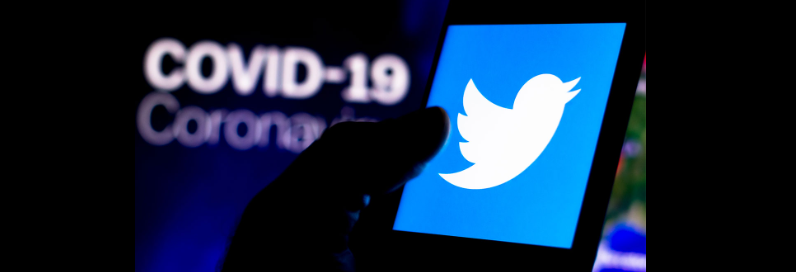

**Problem Description:**

This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then. The names and usernames have been given codes to avoid any privacy concerns.

**Notebook Context:**

This notebook aims at building at text classification engine from the content of Coronavirus Tweets NLP - Text Classifiation dataset that contains around 41157 reviews. Basically, the engine works as follows: after user has provided with tweet, the engine cleans the data and tries to classify the tweet as positive, negative or neutral.

# **1. Importing Libraries and Loading Dataset**

In [ ]:
# To just ignore all the warnings.
import warnings
warnings.filterwarnings("ignore")
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
# checking GPU availability for computational power 
# 0 = GPU Active 
# 1 = GPU inactive
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gitly==1.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Basic Dependencies
import pandas as pd
import numpy as np
# For basic Ploting graph and charts
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
# For more plotting options
import seaborn as sns
plt.style.use('seaborn-darkgrid')
# Using Plotly instance methods to plot your data on interactive maps and charts
import plotly.express as px
import plotly.graph_objects as go
from gitly.colab.plot import GitlyPlotter
# Instantiate the object using 'github' or 'git' for static plots
# or 'colab' for default dinamic Plotly plots
gitly = GitlyPlotter('github')
# wordclound
from PIL import Image # Python Imaging Library
from wordcloud import WordCloud, ImageColorGenerator
# For machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import WhitespaceTokenizer
from collections import Counter
from bs4 import BeautifulSoup
import io # allows us to manage the file-related input and output operations
import re # regular expression
import time
import math
import string # create a string template for simpler string substitutions
import urllib #Python module for fetching URLs
import requests # The requests module allows you to send HTTP requests using Python
import neattext.functions as nfx # NLP package for cleaning text.

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
# setting up output limit 
pd.set_option('max_rows', 15) # Set value to print max 25 rows of dataframe in output
pd.set_option('display.max_columns', None) # set value at 'None' to print unlimited column elements in output
# pd.set_option('display.max_colwidth', -1) # max column width

In [ ]:
# Loading file from drive
from google.colab import files
uploaded = files.upload()

Saving Coronavirus Tweets.csv to Coronavirus Tweets.csv


In [ ]:
# Loading up the data into a DataFrame
tweet_data = pd.read_csv(io.BytesIO(uploaded['Coronavirus Tweets.csv']), encoding="ISO-8859-1", parse_dates=['TweetAt'])

# Shape of data.
print(f'Diamentions: {tweet_data.shape[0]} x {tweet_data.shape[1]}')

Diamentions: 41157 x 6


In [ ]:
tweet_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       32567 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.9+ MB


# **2. Data Preprocessing**




# Fixing data structure and missing values



In [ ]:
# checking Null values
nulls = tweet_data.isna().sum().sort_values(ascending=False)
total_elements = tweet_data.shape[0]
null_percentage = (tweet_data.isnull().sum()/total_elements).sort_values(ascending=False)

null_table = pd.concat([nulls, null_percentage], axis=1, keys=['Total_Missing', 'Missing%'])
null_table.reset_index(inplace=True)
null_table.rename(columns= {"index": " Column_Name"})
print(null_table)

           index  Total_Missing  Missing%
0       Location           8590  0.208713
1       UserName              0  0.000000
2     ScreenName              0  0.000000
3        TweetAt              0  0.000000
4  OriginalTweet              0  0.000000
5      Sentiment              0  0.000000


In [ ]:
tweet_data['Location'].fillna('Unknown', inplace = True)

In [ ]:
tweet_data.isna().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64


# Sentiment Distribution

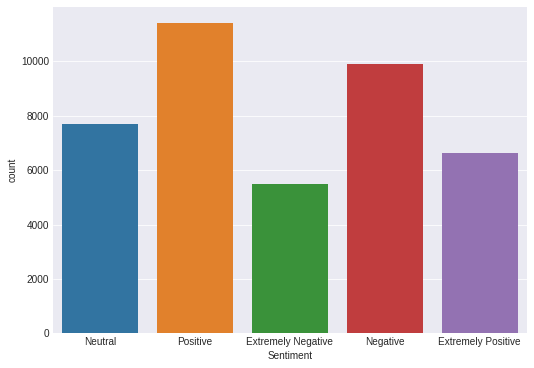

In [ ]:
# Sentiment count in the data
plt.figure(figsize=(8.5,6))
sns.countplot(x='Sentiment',data = tweet_data)
plt.show()

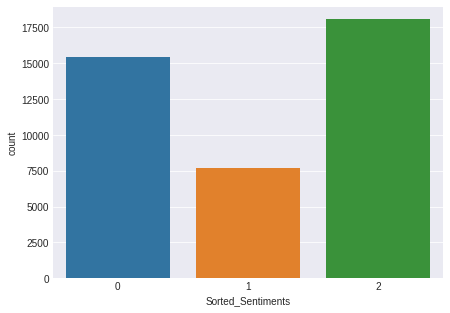

In [ ]:
# There are 5 categories of sentiments in the section, let's convert them to 3 main categories
tweet_data['Sorted_Sentiments'] = tweet_data['Sentiment'].replace({'Extremely Positive': 2, 'Positive': 2, 'Extremely Negative': 0, 'Negative': 0, 'Neutral': 1})
plt.figure(figsize=(7,5))
sns.countplot(x='Sorted_Sentiments',data= tweet_data)
plt.show()

# Extracting Hashtags

In [ ]:
hashtags = tweet_data['OriginalTweet'].apply(nfx.extract_hashtags)

In [ ]:
# Looping through the tweet column to extract #tags
z =[]
for j in range(len(hashtags)):
    if hashtags[j]:
        for k in range(len(hashtags[j])):
            z.append((hashtags[j][k], tweet_data['Sorted_Sentiments'][j]))
        else:
            continue

# converting the list to dataframe
hashtag_sentiment_df =pd.DataFrame(z, columns=["Hashtags", "Sentiment"])

# Extracting User Handles

In [ ]:
userhandels = tweet_data['OriginalTweet'].apply(nfx.extract_userhandles)

In [ ]:
# Looping through the tweet column to extract @users
z =[]
for j in range(len(userhandels)):
    if userhandels[j]:
        for k in range(len(userhandels[j])):
            z.append((userhandels[j][k], tweet_data['Sorted_Sentiments'][j]))
        else:
            continue
            
# converting the list to dataframe
userhandels_sentiment_df = pd.DataFrame(z, columns=["UserHandel", "Sentiment"])

# Text Cleaning

Text cleaning is the process of preparing raw text for any kind of mechine learning model so that they/machines can understand human language. Gathering, sorting, and preparing data is the most important step in the data analysis process – bad data can have cumulative negative effects downstream if it is not corrected. 

So, Lets start the process with removing the concatnated words (contractions), removing hashtags, Stopwords in different languages and other unwanted characters. 

In [ ]:
# removing contractions
tweet_data['OriginalTweet'] = tweet_data['OriginalTweet'].apply(nfx.fix_contractions)

In [ ]:
# remove #tags with words
tweet_data['OriginalTweet'] = tweet_data['OriginalTweet'].apply(nfx.remove_hashtags)

In [ ]:
# removing Spanish and french Stopwords
tweet_data['OriginalTweet'] = tweet_data['OriginalTweet'].apply(lambda x: 
                                                                nfx.remove_stopwords(x,lang=['es','fr','ru','de']))

# Creating a list of Hinglish stopwords manually 
# as there`s a mojoirty of tweets from India in current data

Hinglish_STOPWORDS = ['aa', 'aaa', 'aaaand', 'aahh', 'aalto', 'aap', 'aapi', 'aapka', 'a', 'aadi', 'aaj', 'aap', 'aapne', 'aata', 'aati', 'aaya', 'aaye', 'ab', 'abbe', 'abbey', 'abe', 'abhi', 'able', 'about', 'above', 'accha', 'according', 'accordingly', 'acha', 'achcha', 'across', 'actually', 'after', 'afterwards', 'again', 'against', 'agar', 'ain', 'aint', 'ain\'t', 'aisa', 'aise', 'aisi', 'alag', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'andar', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'ap', 'apan', 'apart', 'apna', 'apnaa', 'apne', 'apni', 'appear', 'are', 'aren', 'arent', 'aren\'t', 'around', 'arre', 'as', 'aside', 'ask', 'asking', 'at', 'aur', 'avum', 'aya', 'aye', 'baad', 'baar', 'bad', 'bahut', 'bana', 'banae', 'banai', 'banao', 'banaya', 'banaye', 'banayi', 'banda', 'bande', 'bandi', 'bane', 'bani', 'bas', 'bata', 'batao', 'bc', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'bhai', 'bheetar', 'bhi', 'bhitar', 'bht', 'bilkul', 'bohot', 'bol', 'bola', 'bole', 'boli', 'bolo', 'bolta', 'bolte', 'bolti', 'both', 'brief', 'bro', 'btw', 'but', 'by', 'came', 'can', 'cannot', 'cant', 'can\'t', 'cause', 'causes', 'certain', 'certainly', 'chahiye', 'chaiye', 'chal', 'chalega', 'chhaiye', 'clearly', 'c\'mon', 'com', 'come', 'comes', 'could', 'couldn', 'couldnt', 'couldn\'t', 'd', 'de', 'dede', 'dega', 'degi', 'dekh', 'dekha', 'dekhe', 'dekhi', 'dekho', 'denge', 'dhang', 'di', 'did', 'didn', 'didnt', 'didn\'t', 'dijiye', 'diya', 'diyaa', 'diye', 'diyo', 'do', 'does', 'doesn', 'doesnt', 'doesn\'t', 'doing', 'done', 'dono', 'dont', 'don\'t', 'doosra', 'doosre', 'down', 'downwards', 'dude', 'dunga', 'dungi', 'during', 'dusra', 'dusre', 'dusri', 'dvaara', 'dvara', 'dwaara', 'dwara', 'each', 'edu', 'eg', 'eight', 'either', 'ek', 'else', 'elsewhere', 'enough', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'exactly', 'example', 'except', 'far', 'few', 'fifth', 'fir', 'first', 'five', 'followed', 'following', 'follows', 'for', 'forth', 'four', 'from', 'further', 'furthermore', 'gaya', 'gaye', 'gayi', 'get', 'gets', 'getting', 'ghar', 'given', 'gives', 'go', 'goes', 'going', 'gone', 'good', 'got', 'gotten', 'greetings', 'haan', 'had', 'hadd', 'hadn', 'hadnt', 'hadn\'t', 'hai', 'hain', 'hamara', 'hamare', 'hamari', 'hamne', 'han', 'happens', 'har', 'hardly', 'has', 'hasn', 'hasnt', 'hasn\'t', 'have', 'haven', 'havent', 'haven\'t', 'having', 'he', 'hello', 'help', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'here\'s', 'hereupon', 'hers', 'herself', 'he\'s', 'hi', 'him', 'himself', 'his', 'hither', 'hm', 'hmm', 'ho', 'hoga', 'hoge', 'hogi', 'hona', 'honaa', 'hone', 'honge', 'hongi', 'honi', 'hopefully', 'hota', 'hotaa', 'hote', 'hoti', 'how', 'howbeit', 'however', 'hoyenge', 'hoyengi', 'hu', 'hua', 'hue', 'huh', 'hui', 'hum', 'humein', 'humne', 'hun', 'huye', 'huyi', 'i', 'i\'d', 'idk', 'ie', 'if', 'i\'ll', 'i\'m', 'imo', 'in', 'inasmuch', 'inc', 'inhe', 'inhi', 'inho', 'inka', 'inkaa', 'inke', 'inki', 'inn', 'inner', 'inse', 'insofar', 'into', 'inward', 'is', 'ise', 'isi', 'iska', 'iskaa', 'iske', 'iski', 'isme', 'isn', 'isne', 'isnt', 'isn\'t', 'iss', 'isse', 'issi', 'isski', 'it', 'it\'d', 'it\'ll', 'itna', 'itne', 'itni', 'itno', 'its', 'it\'s', 'itself', 'ityaadi', 'ityadi', 'i\'ve', 'ja', 'jaa', 'jab', 'jabh', 'jaha', 'jahaan', 'jahan', 'jaisa', 'jaise', 'jaisi', 'jata', 'jayega', 'jidhar', 'jin', 'jinhe', 'jinhi', 'jinho', 'jinhone', 'jinka', 'jinke', 'jinki', 'jinn', 'jis', 'jise', 'jiska', 'jiske', 'jiski', 'jisme', 'jiss', 'jisse', 'jitna', 'jitne', 'jitni', 'jo', 'just', 'jyaada', 'jyada', 'k', 'ka', 'kaafi', 'kab', 'kabhi', 'kafi', 'kaha', 'kahaa', 'kahaan', 'kahan', 'kahi', 'kahin', 'kahte', 'kaisa', 'kaise', 'kaisi', 'kal', 'kam', 'kar', 'kara', 'kare', 'karega', 'karegi', 'karen', 'karenge', 'kari', 'karke', 'karna', 'karne', 'karni', 'karo', 'karta', 'karte', 'karti', 'karu', 'karun', 'karunga', 'karungi', 'kaun', 'kaunsa', 'kayi', 'kch', 'ke', 'keep', 'keeps', 'keh', 'kehte', 'kept', 'khud', 'ki', 'kin', 'kine', 'kinhe', 'kinho', 'kinka', 'kinke', 'kinki', 'kinko', 'kinn', 'kino', 'kis', 'kise', 'kisi', 'kiska', 'kiske', 'kiski', 'kisko', 'kisliye', 'kisne', 'kitna', 'kitne', 'kitni', 'kitno', 'kiya', 'kiye', 'know', 'known', 'knows', 'ko', 'koi', 'kon', 'konsa', 'koyi', 'krna', 'krne', 'kuch', 'kuchch', 'kuchh', 'kul', 'kull', 'kya', 'kyaa', 'kyu', 'kyuki', 'kyun', 'kyunki', 'lagta', 'lagte', 'lagti', 'last', 'lately', 'later', 'le', 'least', 'lekar', 'lekin', 'less', 'lest', 'let', 'let\'s', 'li', 'like', 'liked', 'likely', 'little', 'liya', 'liye', 'll', 'lo', 'log', 'logon', 'lol', 'look', 'looking', 'looks', 'ltd', 'lunga', 'm', 'maan', 'maana', 'maane', 'maani', 'maano', 'magar', 'mai', 'main', 'maine', 'mainly', 'mana', 'mane', 'mani', 'mano', 'many', 'mat', 'may', 'maybe', 'me', 'mean', 'meanwhile', 'mein', 'mera', 'mere', 'merely', 'meri', 'might', 'mightn', 'mightnt', 'mightn\'t', 'mil', 'mjhe', 'more', 'moreover', 'most', 'mostly', 'much', 'mujhe', 'must', 'mustn', 'mustnt', 'mustn\'t', 'my', 'myself', 'na', 'naa', 'naah', 'nahi', 'nahin', 'nai', 'name', 'namely', 'nd', 'ne', 'near', 'nearly', 'necessary', 'neeche', 'need', 'needn', 'neednt', 'needn\'t', 'needs', 'neither', 'never', 'nevertheless', 'new', 'next', 'nhi', 'nine', 'no', 'nobody', 'non', 'none', 'noone', 'nope', 'nor', 'normally', 'not', 'nothing', 'novel', 'now', 'nowhere', 'o', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'own', 'par', 'pata', 'pe', 'pehla', 'pehle', 'pehli', 'people', 'per', 'perhaps', 'phla', 'phle', 'phli', 'placed', 'please', 'plus', 'poora', 'poori', 'provides', 'pura', 'puri', 'q', 'que', 'quite', 'raha', 'rahaa', 'rahe', 'rahi', 'rakh', 'rakha', 'rakhe', 'rakhen', 'rakhi', 'rakho', 'rather', 're', 'really', 'reasonably', 'regarding', 'regardless', 'regards', 'rehte', 'rha', 'rhaa', 'rhe', 'rhi', 'ri', 'right', 's', 'sa', 'saara', 'saare', 'saath', 'sab', 'sabhi', 'sabse', 'sahi', 'said', 'sakta', 'saktaa', 'sakte', 'sakti', 'same', 'sang', 'sara', 'sath', 'saw', 'say', 'saying', 'says', 'se', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sensible', 'sent', 'serious', 'seriously', 'seven', 'several', 'shall', 'shan', 'shant', 'shan\'t', 'she', 'she\'s', 'should', 'shouldn', 'shouldnt', 'shouldn\'t', 'should\'ve', 'si', 'since', 'six', 'so', 'soch', 'some', 'somebody', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'still', 'sub', 'such', 'sup', 'sure', 't', 'tab', 'tabh', 'tak', 'take', 'taken', 'tarah', 'teen', 'teeno', 'teesra', 'teesre', 'teesri', 'tell', 'tends', 'tera', 'tere', 'teri', 'th', 'tha', 'than', 'thank', 'thanks', 'thanx', 'that', 'that\'ll', 'thats', 'that\'s', 'the', 'theek', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'theres', 'there\'s', 'thereupon', 'these', 'they', 'they\'d', 'they\'ll', 'they\'re', 'they\'ve', 'thi', 'thik', 'thing', 'think', 'thinking', 'third', 'this', 'tho', 'thoda', 'thodi', 'thorough', 'thoroughly', 'those', 'though', 'thought', 'three', 'through', 'throughout', 'thru', 'thus', 'tjhe', 'to', 'together', 'toh', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'true', 'truly', 'try', 'trying', 'tu', 'tujhe', 'tum', 'tumhara', 'tumhare', 'tumhari', 'tune', 'twice', 'two', 'um', 'umm', 'un', 'under', 'unhe', 'unhi', 'unho', 'unhone', 'unka', 'unkaa', 'unke', 'unki', 'unko', 'unless', 'unlikely', 'unn', 'unse', 'until', 'unto', 'up', 'upar', 'upon', 'us', 'use', 'used', 'useful', 'uses', 'usi', 'using', 'uska', 'uske', 'usne', 'uss', 'usse', 'ussi', 'usually', 'vaala', 'vaale', 'vaali', 'vahaan', 'vahan', 'vahi', 'vahin', 'vaisa', 'vaise', 'vaisi', 'vala', 'vale', 'vali', 'various', 've', 'very', 'via', 'viz', 'vo', 'waala', 'waale', 'waali', 'wagaira', 'wagairah', 'wagerah', 'waha', 'wahaan', 'wahan', 'wahi', 'wahin', 'waisa', 'waise', 'waisi', 'wala', 'wale', 'wali', 'want', 'wants', 'was', 'wasn', 'wasnt', 'wasn\'t', 'way', 'we', 'we\'d', 'well', 'we\'ll', 'went', 'were', 'we\'re', 'weren', 'werent', 'weren\'t', 'we\'ve', 'what', 'whatever', 'what\'s', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'where\'s', 'whereupon', 'wherever', 'whether', 'which', 'while', 'who', 'whoever', 'whole', 'whom', 'who\'s', 'whose', 'why', 'will', 'willing', 'with', 'within', 'without', 'wo', 'woh', 'wohi', 'won', 'wont', 'won\'t', 'would', 'wouldn', 'wouldnt', 'wouldn\'t', 'y', 'ya', 'yadi', 'yah', 'yaha', 'yahaan', 'yahan', 'yahi', 'yahin', 'ye', 'yeah', 'yeh', 'yehi', 'yes', 'yet', 'you', 'you\'d', 'you\'ll', 'your', 'you\'re', 'yours', 'yourself', 'yourselves', 'you\'ve', 'yup']

len(Hinglish_STOPWORDS)

1044

In [ ]:
# Using stopwords library from nltk and NeatText
STOPWORDS = set(stopwords.words('english') + Hinglish_STOPWORDS)

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", " will not", phrase)
    phrase = re.sub(r"can\'t", " can not", phrase)
    
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", "are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

from tqdm import tqdm
preprocessed_tweets = []
# tqdm is for printing the status bar
for sentance in tqdm(tweet_data['OriginalTweet'].values):
    sentance = re.sub(r'https?://\S+|www\.\S+', r'', sentance) # remove URLS
    sentance = re.sub(r'<.*?>', r'', sentance) # remove HTML
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance) 
    sentance = re.sub(r'@[A-Za-z0-9_]+','', sentance) # remove mentions with words as they don`t hold any meaning & significance
    sentance = re.sub(r'\d+', '', sentance).strip() # remove number
    sentance = re.sub(r"[^\w\s\d]","", sentance) # remove pnctuations
    sentance = re.sub(r"\s+"," ", sentance).strip() # remove space
    sentance = re.sub("\S*\d\S*", "", sentance).strip() # regexp class which removes single digit characters and whitespace in betwen
    sentance = re.sub('[^A-Za-z]+', ' ', sentance) # specifies the matching of charaters in both Upper & lower case

    # converting the words in the sentence in lower case and also removing the whitespace in between
    sentance = ' '.join([word.lower() for word in sentance.split() if not word.lower() in STOPWORDS])
    preprocessed_tweets.append(sentance.strip())

100%|██████████| 41157/41157 [00:12<00:00, 3386.76it/s]


In [ ]:
preprocessed_tweets[:5]

['',
 'advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist gp set online shopping accounts poss adequate supplies regular meds order',
 'coronavirus australia woolworths elderly disabled dedicated shopping hours amid covid outbreak',
 'food stock empty panic food stay calm stay safe',
 'ready supermarket outbreak paranoid food stock litteraly empty panic shortage']

In [ ]:
tweet_data['Cleaned_tweets'] = preprocessed_tweets

In [ ]:
# removing non_ASCII
tweet_data['Cleaned_tweets'] = tweet_data['Cleaned_tweets'].apply(nfx.remove_non_ascii)

In [ ]:
tweet_data.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sorted_Sentiments,Cleaned_tweets
0,3799,48751,London,2020-03-16,@menyrbie @phil_gahan @chrisitv https://t.co/i...,Neutral,1,
1,3800,48752,UK,2020-03-16,advice talk neighbours family exchange phone n...,Positive,2,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,2020-03-16,"coronavirus australia: woolworths elderly, dis...",Positive,2,coronavirus australia woolworths elderly disab...


# **3. Exploratory Analysis**

# Locations with most of the tweets



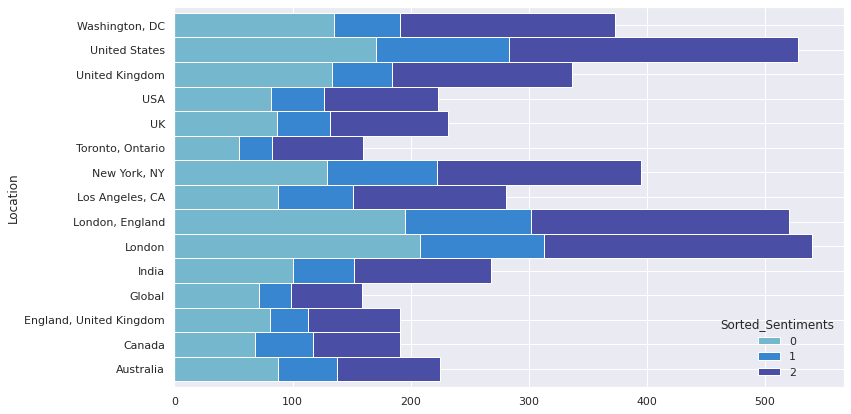

In [ ]:
# sorting Locations w.r.t most number tweets has been made
tweet_lococations = tweet_data[tweet_data['Location'].isin(tweet_data['Location'].value_counts()[1:16].index)]
# Now Ploting
pd.crosstab(tweet_lococations.Location, tweet_lococations.Sorted_Sentiments).plot.barh(stacked=True,width=1, color=sns.color_palette("icefire", 9))
fig=plt.gcf()
fig.set_size_inches(12,7)
plt.show() 

In [ ]:
top_locations = tweet_data['Location'].value_counts().reset_index().rename(columns = {
    'index':'Location','Location':'Count'})
top_locations[:10]

,Location,Count
0,Unknown,8593
1,London,540
2,United States,528
3,"London, England",520
4,"New York, NY",395
5,"Washington, DC",373
6,United Kingdom,337
7,"Los Angeles, CA",281
8,India,268
9,UK,232


Seems, like London had most no of tweets made during the 2020. Both Most of number of Nagetive and positive tweets has been made from London itself while Americans were on second place for there presence in Twitter. 

Speaking of locations, Most of the tweets has been made anonumly or without a location share, which contribute around 21% of the total tweets made globelly. On the second place, It is **London and London, England** both contributed around 2.5% of total tweets made globelly.

# Locations with most number of Negative Tweets made

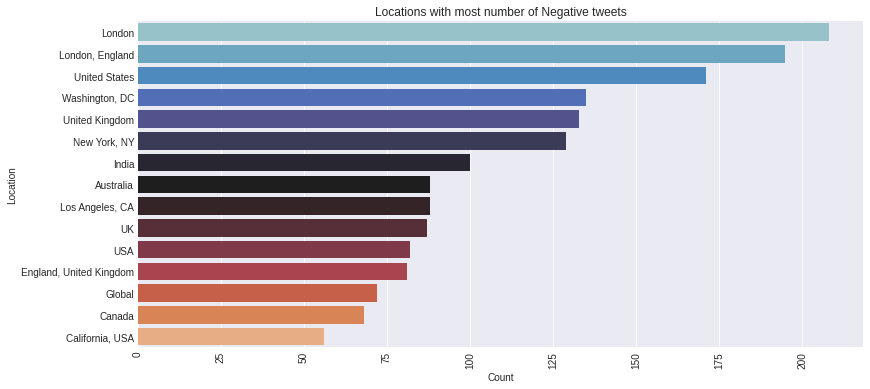

In [ ]:
# Ploting a bar chart with seaborn
nag_tweet_log = tweet_data.loc[tweet_data['Sorted_Sentiments'] == 0]
nag_tweet_location = nag_tweet_log['Location'].value_counts().reset_index().rename(columns={'index':'Location','Location':'Count'})

# Using matplotlib to plot a line chart to vitualize the data above 
sns.barplot(y = nag_tweet_location['Location'][1:16], x= nag_tweet_location['Count'][1:16], palette=('icefire'))
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(13,6)
plt.title('Locations with most number of Negative tweets')
plt.show()

**Most number of Negative Tweets came from London, UK.**

# Locations with most number of Positive Tweets made

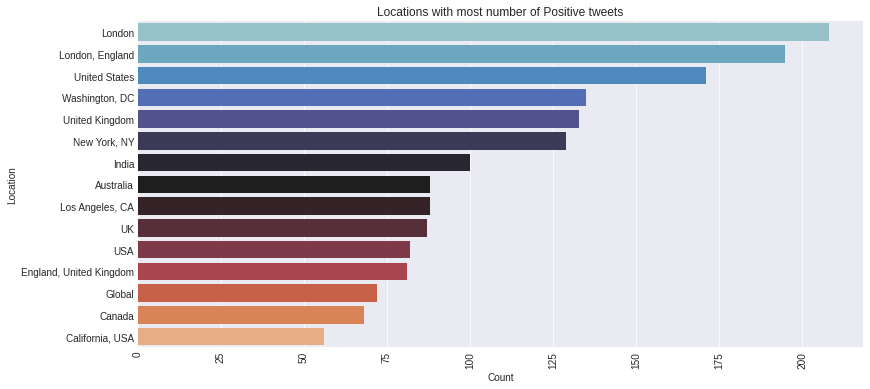

In [ ]:
# Ploting a bar chart with seaborn
pos_tweet_log = tweet_data.loc[tweet_data['Sorted_Sentiments'] == 2]
pos_tweet_location = nag_tweet_log['Location'].value_counts().reset_index().rename(columns={'index':'Location','Location':'Count'})

# Using matplotlib to plot a line chart to vitualize the data above 
sns.barplot(y = pos_tweet_location['Location'][1:16], x= pos_tweet_location['Count'][1:16], palette=('icefire'))
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(13,6)
plt.title('Locations with most number of Positive tweets')
plt.show()

**Most number of positive Tweets also came from London, UK.**



# Hash Tags



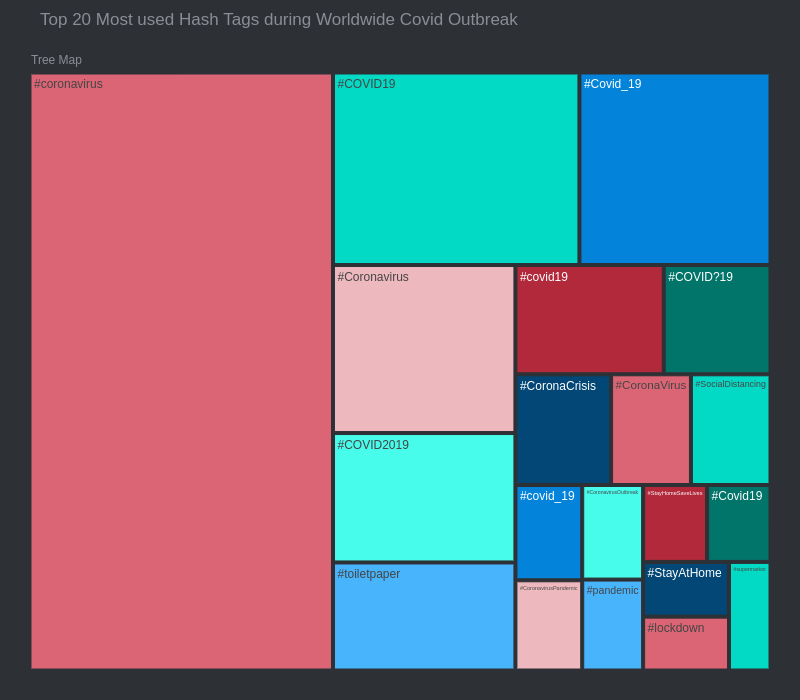

In [ ]:
# 3 creating a datafram
hashtag_data = hashtag_sentiment_df['Hashtags'].value_counts()[0:20].reset_index().rename(columns={'index':'Hashtags','Hashtags':'Count'})

# Using plotly to plot a tree map
fig = px.treemap(hashtag_data, path=[px.Constant("Tree Map"), 'Hashtags' ], 
                 color_discrete_sequence=['#DB6574', '#03DAC5', '#0384da'], values='Count')

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), height = 700, width = 800, 
                  plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                  title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                  font=dict(color='#8a8d93'), title= 'Top 20 Most used Hash Tags during Worldwide Covid Outbreak')

gitly.config_render('git', default_height = 700, default_width = 800)
gitly.show(fig)

Most of hashtags were made on Corona virus just like its variants. The **#coronavirus** has topped the charts with 12,320 usage in tweets all around the world. Skipping the variants hastags of coronavirus, The second different hashtag was most used is **#toiletpaper** which was got pretty popular specially in US.

# User Handles

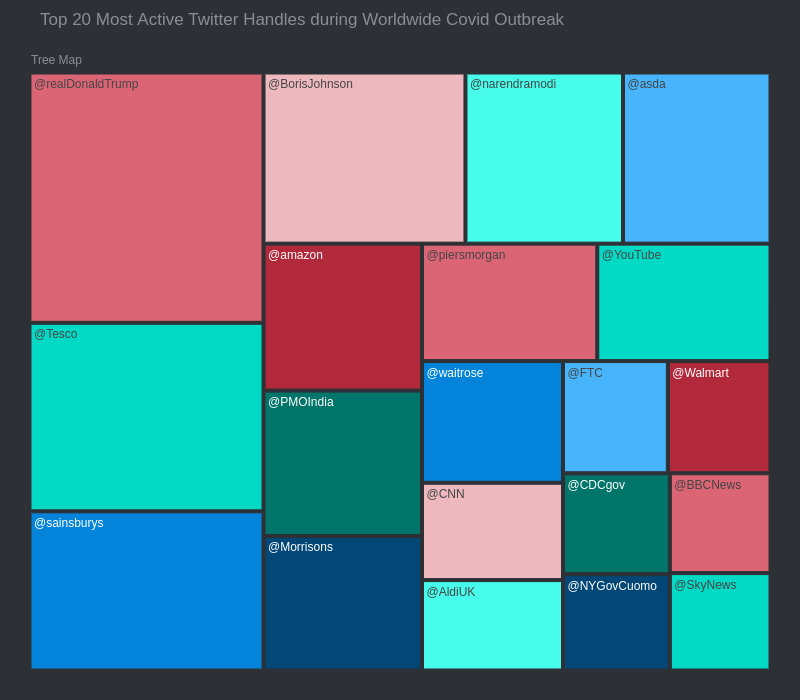

In [ ]:
# 3 creating a datafram
userhandle_data = userhandels_sentiment_df['UserHandel'].value_counts()[0:20].reset_index().rename(columns={'index':'UserHandel','UserHandel':'Count'})

# Using plotly to plot a tree map
fig = px.treemap(userhandle_data, path=[px.Constant("Tree Map"), 'UserHandel' ], 
                 color_discrete_sequence=['#DB6574', '#03DAC5', '#0384da'], values='Count')

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), height = 700, width = 800, 
                  plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                  title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                  font=dict(color='#8a8d93'), title= 'Top 20 Most Active Twitter Handles during Worldwide Covid Outbreak')

gitly.config_render('git', default_height = 700, default_width = 800)
gitly.show(fig)

**Donald Trump** was the most active and tagged Tweet user duringb the Covid outbreak in 2020 with 230 apperences. The popularity grew up soon after the lockdown and scarce food resource and dont forget the toiletpaper situation. **Tesco Plc** aka **Tesco** which is a multinational retailer of general merchandise was in the second most tagged and active twitter handle which made around 180 apperences. 



# Most used Common Words



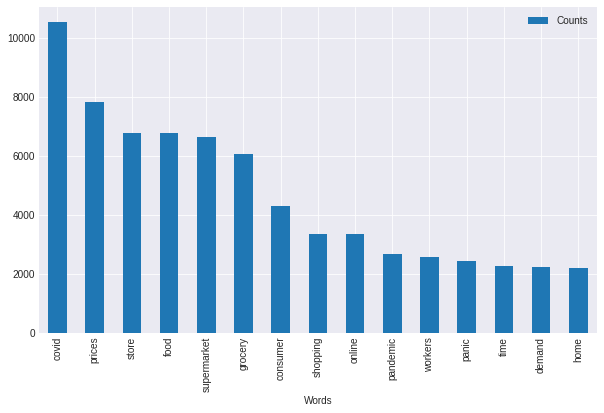

In [ ]:
# Activating collections library for filtering words in tweets
# looping to get most used words
count = Counter()
for text in tweet_data['Cleaned_tweets'].values:
  for word in text.split():
    count[word] += 1
        
text_list = count.most_common(15)
# ploting a bar graph
plt.rcParams["figure.figsize"] = (10,6)
pd.DataFrame(text_list, columns=['Words','Counts']).set_index('Words').plot(kind='bar')
plt.show()

Its not a surprice that **covid** is the most common word used in the tweets. It made more than 12000 apperence in tweets globelly. After then that words like, **prices, store, food, supermarket and grocery** were most used words.



# Wordclouds across all the Sentiments



In [ ]:
# Get all the pozitive and negative tweets
Positive = tweet_data[tweet_data.Sorted_Sentiments == 2]
Negative = tweet_data[tweet_data.Sorted_Sentiments == 0]
Neutral = tweet_data[tweet_data.Sorted_Sentiments == 1]
# Create numpy list to visualize using wordcloud
positive_text = " ".join(Positive.Cleaned_tweets.to_numpy().tolist())
negative_text = " ".join(Negative.Cleaned_tweets.to_numpy().tolist())
neutral_text = " ".join(Neutral.Cleaned_tweets.to_numpy().tolist())

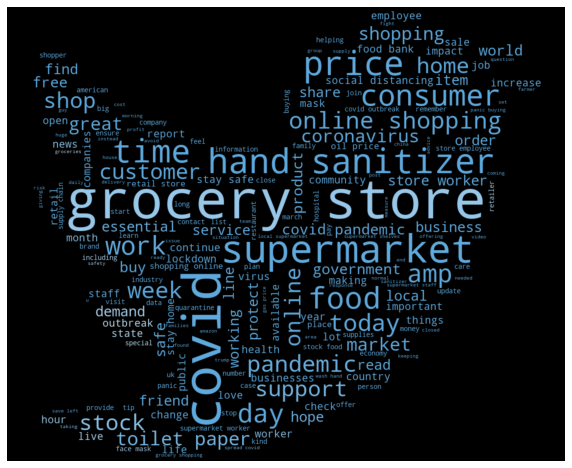

In [ ]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream = True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
positive_cloud = WordCloud(height = 2000, width = 4000, background_color='black', 
                           stopwords = STOPWORDS, mask = Mask).generate(positive_text)

# Size of the image generated 
plt.figure(figsize = (10, 20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated
plt.imshow(positive_cloud.recolor(color_func = image_colors), interpolation='hamming')
plt.axis('off') # turn off axis
plt.show()

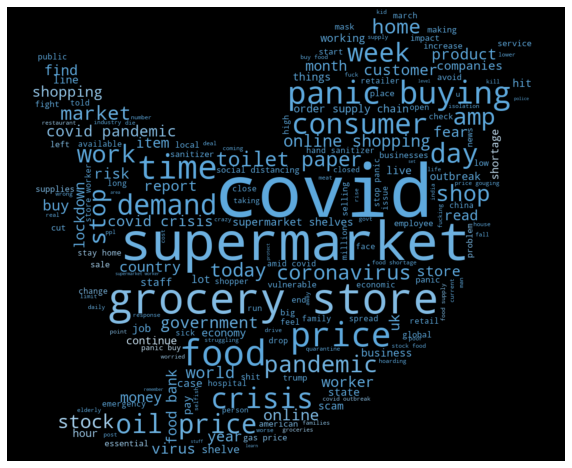

In [ ]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream = True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color = 'black', height = 1500, width = 4000, 
               stopwords = STOPWORDS, mask = Mask).generate(negative_text)
plt.figure(figsize = (10, 20))
plt.imshow(wc.recolor(color_func = image_colors), interpolation = "hamming")
plt.axis('off')
plt.show()

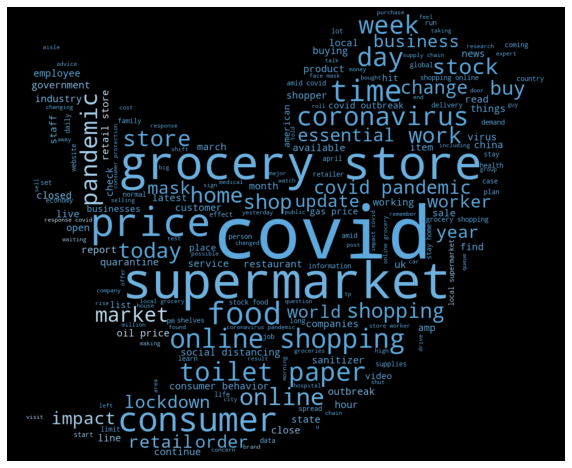

In [ ]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream = True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color = 'black', height = 1500, width = 4000, 
               stopwords = STOPWORDS,mask = Mask).generate(neutral_text)
plt.figure(figsize = (10, 20))
plt.imshow(wc.recolor(color_func = image_colors), interpolation = "hamming")
plt.axis('off')
plt.show()

# Average Tweet Text Length



In [ ]:
tweet_data['text_length'] = tweet_data['Cleaned_tweets'].apply(len)
#Calculate average length by label types
labels = tweet_data.groupby('Sorted_Sentiments').mean().round(1)
labels

,UserName,ScreenName,text_length
Sorted_Sentiments,,,
0,23578.2,68530.2,99.3
1,24998.3,69950.3,67.0
2,24793.0,69745.0,98.1


# **4. Words Preprocessing**


In [ ]:
final_tweets = tweet_data.copy()

# Tokenization

We use the Tokenization method to split a sentence into tokens or words.



In [ ]:
# Calling the whitespace tokenizer
W_tokenizer = WhitespaceTokenizer()

# Now applying it on the target column
final_tweets['Cleaned_tweets'] = final_tweets['Cleaned_tweets'].apply(W_tokenizer.tokenize)
display(final_tweets['Cleaned_tweets'].head(5))

0                                                   []
1    [advice, talk, neighbours, family, exchange, p...
2    [coronavirus, australia, woolworths, elderly, ...
3    [food, stock, empty, panic, food, stay, calm, ...
4    [ready, supermarket, outbreak, paranoid, food,...
Name: Cleaned_tweets, dtype: object



# Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. 



In [ ]:
lemmatizer = WordNetLemmatizer()
def lemma_wordnet(input):
    return [lemmatizer.lemmatize(word) for word in input]

final_tweets['Cleaned_tweets'] = final_tweets['Cleaned_tweets'].apply(lemma_wordnet)

# Stemming

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”. It is an important part of the pipelining process in Natural language processing. The input to the stemmer is tokenized words. 

In [ ]:
Sstemmer = SnowballStemmer('english')
def snowball_Stemmer(input):
    return [Sstemmer.stem(word) for word in input]

final_tweets['Cleaned_tweets'] = final_tweets['Cleaned_tweets'].apply(snowball_Stemmer)

# Short Words Removal

In [ ]:
# remove words with less than 2 letters to reduce noice

useless_words = []
for sentence in final_tweets.Cleaned_tweets:
  for word in sentence:
    if len(word) <= 2 or None:
      useless_words.append(word)
      sentence.remove(word)

In [ ]:
# its totally fine to discard these words as they don`t hold any meaning
# and can potentially affect model performence
useless_words[:10]

['gp', 'po', 'dm', 'dm', 'uk', 'cn', 'b', 'id', 'tp', 'la']

In [ ]:
display(final_tweets['Cleaned_tweets'].head(5))

0                                                   []
1    [advic, talk, neighbour, famili, exchang, phon...
2    [coronavirus, australia, woolworth, elder, dis...
3    [food, stock, empti, panic, food, stay, calm, ...
4    [readi, supermarket, outbreak, paranoid, food,...
Name: Cleaned_tweets, dtype: object

In [ ]:
# finally Combining individual words
def combine_text(input):
    combined = ' '.join(input)
    return combined
final_tweets['Cleaned_tweets'] = final_tweets['Cleaned_tweets'].apply(combine_text)
display(final_tweets['Cleaned_tweets'].head(5))

0                                                     
1    advic talk neighbour famili exchang phone numb...
2    coronavirus australia woolworth elder disabl d...
3      food stock empti panic food stay calm stay safe
4    readi supermarket outbreak paranoid food stock...
Name: Cleaned_tweets, dtype: object

# Comparison

In [ ]:
print('--------------------- Before applying Tokenizer ---------------------')
print('Average Tweet text length: ', tweet_data['Cleaned_tweets'].apply(len).mean().astype(int))
print('Max Tweet text length: ', tweet_data['Cleaned_tweets'].apply(len).max().astype(int))
print('Min Tweet text length: ', tweet_data['Cleaned_tweets'].apply(len).min().astype(int))
print('\n------------ After applying Tokenizer, Lemmatization, Stemming and Shortwords removal ------------')
print('Average Tweet text length: ', final_tweets['Cleaned_tweets'].apply(len).mean().astype(int))
print('Max Tweet text length: ', final_tweets['Cleaned_tweets'].apply(len).max().astype(int))
print('Min Tweet text length: ', final_tweets['Cleaned_tweets'].apply(len).min().astype(int))

--------------------- Before applying Tokenizer ---------------------
Average Tweet text length:  92
Max Tweet text length:  254
Min Tweet text length:  0

------------ After applying Tokenizer, Lemmatization, Stemming and Shortwords removal ------------
Average Tweet text length:  79
Max Tweet text length:  223
Min Tweet text length:  0


# Train-Test Spliting

The vary first step towards, Model implimentation is to divide the dataset into train and test sets so that after traing the data set to the model, we can validate the algorithic process with a untouched set. 

In [ ]:
# Using only cleaned feature and label column
X = final_tweets['Cleaned_tweets']
y = final_tweets['Sorted_Sentiments']

# Spliting the data in Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

print("X_train set : ", X_train.shape)
print("X_test set : ", X_test.shape)
print("y_train set : ", y_train.shape)
print("y_test set : ", y_test.shape)

X_train set :  (28809,)
X_test set :  (12348,)
y_train set :  (28809,)
y_test set :  (12348,)


# TF-IDF (Term Frequency–Inverse Document Frequency)

It is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.



In [ ]:
# TF-IDF >> Convert a collection of raw documents to a matrix of TF-IDF features.

IDF_vec = TfidfVectorizer(norm = None)
# Applying vectorization on features
X_train_vectorized = IDF_vec.fit_transform(X_train)
X_test_vectorized = IDF_vec.transform(X_test)

print("the shape of out text train TFIDF vectorizer ",X_train_vectorized.get_shape())
print("the shape of out text test TFIDF vectorizer ",X_test_vectorized.get_shape())
print("The type of count vectorizer ", type(IDF_vec))
print("Some sample features: ", IDF_vec.get_feature_names()[0:10])

the shape of out text train TFIDF vectorizer  (28809, 20904)
the shape of out text test TFIDF vectorizer  (12348, 20904)
The type of count vectorizer  <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
Some sample features:  ['aajeevika', 'aapl', 'aaron', 'abajila', 'abandon', 'abat', 'abattoir', 'abbott', 'abbrevi', 'abc']


# **5. Model Implimentation**


In [ ]:
def model_evaluation(model, true, predicted):
  
  """Function which gives output of the model implimentation on train 
  and test set (Used as Output Display) """

  train_accuracy = model.score(X_train_vectorized, y_train)
  test_accuracy = accuracy_score(true, predicted)
  report = classification_report(predicted, true)

  print(model,'\n')
  print('Train set Accuracy: ',round((train_accuracy), 2)*100,'%')
  print('Test set Accuracy: ',round((test_accuracy), 2)*100,'%')
  print('Model Report: \n', report)
  print('------------------------------------------------------------------\n')
  print('Confusion Matrix: \n')
  cm = metrics.confusion_matrix(true, predicted)
  cm = cm / np.sum(cm, axis = 1)[:,None]
  labels = y.unique()
  sns.set(rc={'figure.figsize':[5,4]})
  sns.heatmap(cm, xticklabels = labels,
            yticklabels = labels, 
            annot=True, 
            cmap = 'YlGnBu')
  plt.show()
  plt.pause(0.05)

In [ ]:
def base_model_evaluation(model, true, predicted): 
   
  """ Performance report for base model """

  train_accuracy = model.score(X_train_vectorized, y_train)
  test_accuracy = accuracy_score(true, predicted)

  print(model,'\n')
  print('Train set Accuracy: ',round((train_accuracy), 2)*100,'%')
  print('Test set Accuracy: ',round((test_accuracy), 2)*100,'%')

In [ ]:
def performance_metrics(model, true, predicted):
  
  """ Function which evaluates the model and saves the data 
  (Used for making a Comparison table) """

  train_accuracy = model.score(X_train_vectorized, y_train)
  test_accuracy = accuracy_score(true, predicted)
  f1_accuracy = f1_score(true, predicted, average=None)

  return round((train_accuracy), 2)*100, round((test_accuracy), 2)*100, np.round(f1_accuracy, 3)

# **Multiclass classification**

Whether it’s spelled multi-class or multiclass, the science is the same. Multiclass classification is a machine learning classification task that consists of more than two classes, or outputs. 

We are given a set of training samples separated into K distinct classes (In this dataset it is POSITIVE, NEGATIVE & NEUTRAL sentiments) and we create an ML model to forecast which of those classes some previously unknown data belongs to. The model learns patterns specific to each class from the training dataset and utilizes those patterns to forecast the classification of future data.

Some of the most popular algorithms for multi-class classifications that we will be using in this project:

* Multinomial Naive Bayes Classifier
* Stochastic Gradient Descent - SGD Classifier
* SVM (Support Vector Machine)
* AdaBoosted Decision Trees
* Multinomial Logistic Regression

# Naive Bayes Classifier

It is a classification model based on conditional probability and uses Bayes theorem to predict the class of unknown datasets.

In [ ]:
# # Base Model
naiveByes_clf  = MultinomialNB()
naiveByes_clf.fit(X_train_vectorized, y_train)

# prediction
NB_prediction = naiveByes_clf.predict(X_test_vectorized)

# Base Report
base_model_evaluation(naiveByes_clf, y_test, NB_prediction)

MultinomialNB() 

Train set Accuracy:  83.0 %
Test set Accuracy:  65.0 %


**Applying GridSearchCV on base model**

In [ ]:
# Applying HyperTunning on Base Model
grid_params ={'alpha':[10**x for x in range(-4, 4)]}

GSCV_naiveByes_clf = GridSearchCV(naiveByes_clf, grid_params, scoring = 'accuracy', 
                                  cv=10, n_jobs=-1, return_train_score = True, verbose = 1)

%time GSCV_naiveByes_clf.fit(X_train_vectorized, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
CPU times: user 256 ms, sys: 66.9 ms, total: 323 ms
Wall time: 2.7 s


GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

MultinomialNB(alpha=10) 

Train set Accuracy:  79.0 %
Test set Accuracy:  66.0 %
Model Report: 
               precision    recall  f1-score   support

           0       0.73      0.67      0.70      5027
           1       0.23      0.61      0.34       879
           2       0.78      0.65      0.71      6442

    accuracy                           0.66     12348
   macro avg       0.58      0.65      0.58     12348
weighted avg       0.72      0.66      0.68     12348

------------------------------------------------------------------

Confusion Matrix: 



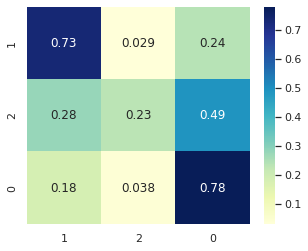

In [ ]:
# Return set of parameters
Tuned_naiveByes_clf = GSCV_naiveByes_clf.best_estimator_

# Checking the prediction and performance of HyperTuned Model
Tuned_NB_pred = Tuned_naiveByes_clf.predict(X_test_vectorized)
model_evaluation(Tuned_naiveByes_clf, y_test, Tuned_NB_pred)

# creating a dataframe to store results
results_df = pd.DataFrame(data=[["Naive Bayes Classifier",*performance_metrics(Tuned_naiveByes_clf, y_test, Tuned_NB_pred)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'F1_Score'])

# Stochastic Gradient Descent - SGD Classifier

SGD Classifier is a linear classifier (SVM, logistic regression, a.o.) optimized by the SGD. It is a simple yet efficient optimization algorithm used to find the values of parameters/coefficients of functions that minimize a cost function.

In [ ]:
# Base Model
SGDClassifier_model = SGDClassifier(max_iter = 10000)

SGDClassifier_model.fit(X_train_vectorized, y_train)

# prediction
SGDC_prediction = SGDClassifier_model.predict(X_test_vectorized)

# Report
base_model_evaluation(SGDClassifier_model, y_test, SGDC_prediction)

SGDClassifier(max_iter=10000) 

Train set Accuracy:  96.0 %
Test set Accuracy:  71.0 %


**Applying GridSearchCV on base model**

In [ ]:
# Applying HyperTunning on Base Model
grid_params ={'alpha':[10**x for x in range(-4, 4)], 
              'loss':['hinge'], 
              'penalty':["l1","l2"], 
              'class_weight':['balanced']} 

GSCV_SGDClassifier = GridSearchCV(SGDClassifier_model, grid_params, scoring = 'accuracy', 
                                  cv = 5, n_jobs = -1, return_train_score = True, verbose = 1)

%time GSCV_SGDClassifier.fit(X_train_vectorized, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
CPU times: user 1.55 s, sys: 256 ms, total: 1.8 s
Wall time: 2min 6s


GridSearchCV(cv=5, estimator=SGDClassifier(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced'], 'loss': ['hinge'],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy', verbose=1)

SGDClassifier(alpha=0.01, class_weight='balanced', max_iter=10000) 

Train set Accuracy:  89.0 %
Test set Accuracy:  76.0 %
Model Report: 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      4488
           1       0.72      0.59      0.65      2839
           2       0.75      0.81      0.78      5021

    accuracy                           0.76     12348
   macro avg       0.75      0.74      0.74     12348
weighted avg       0.76      0.76      0.76     12348

------------------------------------------------------------------

Confusion Matrix: 



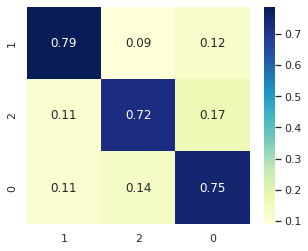

In [ ]:
# Return set of parameters
Tuned_SGDClassifier = GSCV_SGDClassifier.best_estimator_

# Checking the prediction and performance of HyperTuned Model  
Tuned_SGD_pred = Tuned_SGDClassifier.predict(X_test_vectorized)
model_evaluation(Tuned_SGDClassifier, y_test, Tuned_SGD_pred)

# creating a dataframe to store results
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *performance_metrics(Tuned_SGDClassifier, y_test, Tuned_SGD_pred)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'F1_Score'])
results_df = results_df.append(results_df_2, ignore_index=True)

# SVM (Support Vector Machine)

Support vector machines (SVMs) are powerful yet flexible supervised machine learning methods used for classification, regression, and, outliers’ detection. The main goal of SVMs is to divide the datasets into number of classes in order to find a maximum marginal hyperplane (MMH). 

In [ ]:
# Base Model
SVC_Model = SVC(max_iter=10000)
SVC_Model.fit(X_train_vectorized, y_train)

# prediction
SVC_prediction = SVC_Model.predict(X_test_vectorized)

# Report
base_model_evaluation(SVC_Model, y_test, SVC_prediction)

SVC(max_iter=10000) 

Train set Accuracy:  94.0 %
Test set Accuracy:  76.0 %


**Applying RandomizedSearchCV on base model**

In [ ]:
# Applying HyperTunning on Base Model
grid_params ={'C': [2], 'gamma': [0.001],
              'kernel': ['rbf'],'decision_function_shape':['ovr']}

GSCV_SVC_clf = GridSearchCV(SVC_Model, grid_params, refit = True, cv = 10,
                            verbose = 3, return_train_score = True, scoring = 'accuracy')

%time GSCV_SVC_clf.fit(X_train_vectorized, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END C=2, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=(train=0.935, test=0.755) total time= 2.0min
[CV 2/10] END C=2, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=(train=0.936, test=0.753) total time= 2.0min
[CV 3/10] END C=2, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=(train=0.936, test=0.746) total time= 2.0min
[CV 4/10] END C=2, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=(train=0.936, test=0.751) total time= 2.0min
[CV 5/10] END C=2, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=(train=0.936, test=0.759) total time= 2.0min
[CV 6/10] END C=2, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=(train=0.935, test=0.755) total time= 2.0min
[CV 7/10] END C=2, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=(train=0.935, test=0.756) total time= 2.0min
[CV 8/10] END C=2, decision_function_shape=ovr, gamma=0.001, ker

GridSearchCV(cv=10, estimator=SVC(max_iter=10000),
             param_grid={'C': [2], 'decision_function_shape': ['ovr'],
                         'gamma': [0.001], 'kernel': ['rbf']},
             return_train_score=True, scoring='accuracy', verbose=3)

SVC(C=2, gamma=0.001, max_iter=10000) 

Train set Accuracy:  93.0 %
Test set Accuracy:  77.0 %
Model Report: 
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      4433
           1       0.71      0.65      0.68      2520
           2       0.78      0.79      0.78      5395

    accuracy                           0.77     12348
   macro avg       0.76      0.75      0.75     12348
weighted avg       0.77      0.77      0.77     12348

------------------------------------------------------------------

Confusion Matrix: 



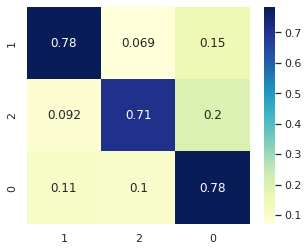

In [ ]:
# Return set of parameters
Tuned_SVC_clf = GSCV_SVC_clf.best_estimator_

# Checking the prediction and performance of HyperTuned Model  
Tuned_SVC_clf_pred = Tuned_SVC_clf.predict(X_test_vectorized)

model_evaluation(Tuned_SVC_clf, y_test, Tuned_SVC_clf_pred) 

# creating a dataframe to store results
results_df_3 = pd.DataFrame(data=[["Support Vector Machine", *performance_metrics(Tuned_SVC_clf, y_test, Tuned_SVC_clf_pred)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'F1_Score'])
results_df = results_df.append(results_df_3, ignore_index=True)

# AdaBoosted Decision Trees

A decision tree is boosted using the AdaBoost. R2 [1] algorithm on a 1D sinusoidal dataset with a small amount of Gaussian noise. The AdaBoost algorithm involves using very short (one-level) decision trees as weak learners that are added sequentially to the ensemble. 

A weak learner is a model that is very simple, although has some skill on the dataset. Boosting was a theoretical concept long before a practical algorithm could be developed, and the AdaBoost (adaptive boosting) algorithm was the first successful approach for the idea.


CPU times: user 18.6 s, sys: 99.9 ms, total: 18.7 s
Wall time: 18.8 s
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=300) 

Train set Accuracy:  81.0 %
Test set Accuracy:  75.0 %
Model Report: 
               precision    recall  f1-score   support

           0       0.75      0.80      0.77      4328
           1       0.77      0.62      0.69      2858
           2       0.73      0.77      0.75      5162

    accuracy                           0.75     12348
   macro avg       0.75      0.73      0.74     12348
weighted avg       0.75      0.75      0.75     12348

------------------------------------------------------------------

Confusion Matrix: 



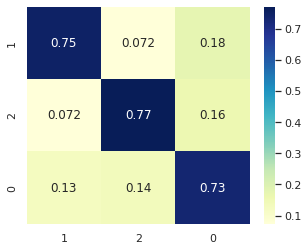

In [ ]:
# Base Model
AdaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=300, learning_rate=0.5)

%time AdaBoost.fit(X_train_vectorized, y_train)

# prediction
AdaBoost_prediction = AdaBoost.predict(X_test_vectorized)

# Report  
model_evaluation(AdaBoost, y_test, AdaBoost_prediction) 

# creating a dataframe to store results
results_df_4 = pd.DataFrame(data=[["AdaBoosted Decision Trees", *performance_metrics(AdaBoost, y_test, AdaBoost_prediction)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'F1_Score'])
results_df = results_df.append(results_df_4, ignore_index=True)

# Logistic Regression

Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. It predicts the output of a categorical dependent variable.

In [ ]:
# Base Model
LogReg = LogisticRegression(multi_class='multinomial')
LogReg.fit(X_train_vectorized, y_train)

# prediction
LogReg_prediction = LogReg.predict(X_test_vectorized)

# Report
base_model_evaluation(LogReg, y_test, LogReg_prediction)

LogisticRegression(multi_class='multinomial') 

Train set Accuracy:  97.0 %
Test set Accuracy:  69.0 %


**Applying GridSearchCV on base model**

In [ ]:
# Applying HyperTunning on Base Model
grid_params = {'C' : [0.01, 0.001], 
               'penalty': ['l1','l2'],
               'solver': ['newton-cg','lbfgs']}

GSCV_LogReg = GridSearchCV(LogReg, grid_params, scoring = 'accuracy', cv = 5, refit = True,
                            n_jobs = -1, return_train_score = True, verbose = 2)

%time GSCV_LogReg.fit(X_train_vectorized, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 3.77 s, sys: 2.93 s, total: 6.69 s
Wall time: 25.4 s


GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.001], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs']},
             return_train_score=True, scoring='accuracy', verbose=2)

LogisticRegression(C=0.01, multi_class='multinomial', solver='newton-cg') 

Train set Accuracy:  91.0 %
Test set Accuracy:  76.0 %
Model Report: 
               precision    recall  f1-score   support

           0       0.78      0.81      0.79      4461
           1       0.66      0.65      0.65      2348
           2       0.79      0.77      0.78      5539

    accuracy                           0.76     12348
   macro avg       0.74      0.74      0.74     12348
weighted avg       0.76      0.76      0.76     12348

------------------------------------------------------------------

Confusion Matrix: 



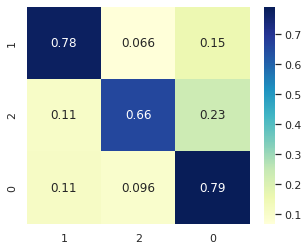

In [ ]:
# Return set of parameters
Tuned_LogReg = GSCV_LogReg.best_estimator_

# Checking the prediction and performance of HyperTuned Model
Tuned_LogReg_pred = Tuned_LogReg.predict(X_test_vectorized)

model_evaluation(Tuned_LogReg, y_test, Tuned_LogReg_pred)

# creating a dataframe to store results
results_df_5 = pd.DataFrame(data=[["Logistic Regression", *performance_metrics(Tuned_LogReg, y_test, Tuned_LogReg_pred)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'F1_Score'])
results_df = results_df.append(results_df_5, ignore_index=True)

# **6. Model Comparison**

In [ ]:
results_df = results_df.drop_duplicates(subset=['Model'])
results_df

,Model,Train_Accuracy,Test_Accuracy,F1_Score
0,Naive Bayes Classifier,79.0,66.0,"[0.703, 0.338, 0.711]"
1,Stochastic Gradient Descent,89.0,76.0,"[0.798, 0.651, 0.779]"
2,Support Vector Machine,93.0,77.0,"[0.798, 0.677, 0.785]"
3,AdaBoosted Decision Trees,81.0,75.0,"[0.775, 0.69, 0.752]"
4,Logistic Regression,91.0,76.0,"[0.793, 0.653, 0.782]"


**Support Vector Machine and Logistic Regression performed better than the other three classifiers, with Support Vector Machine having a slight advantage with a mean F1 score of around 74.6% combined while overall model accuracy is 77% which is good yet have some room for improvement.**

# **7. Saving Model**

In [ ]:
# Saving Model
import pickle

with open('classifier.pkl', 'wb') as f:
    pickle.dump(Tuned_SVC_clf, f)

In [ ]:
# Loading Model
with open('classifier.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)

In [ ]:
# Checking the model predictibility
print(X_test[:5])

loaded_clf.predict(X_test_vectorized[:5])

689      microsoft announc tonight close microsoft store retail locat covid outbreak              
36530    suppli chain manag support reliev covid challeng                                         
3292     demand local food bank typic increas time crisi spokesperson shawna ogston contact ogston
35616    read great column consumer effect covid market guru phil kotler joemandes                
9047     boy supermarket eat booger year feel pretti safe                                         
Name: Cleaned_tweets, dtype: object


array([1, 2, 0, 2, 2])

**From above, Model output check we can see that the model has predicted the correct sentiment from the cleaned tweet texts like...**

* **In first tweet**, There not enough data aka text information available for model to acknowledge if the sentence should be declaired as a Negative or Positive Sentiment thus the Model has marked the sentence as a Neutral Sentiment which is pretty much accurate.

* **In Second, Fourth and Last Tweets**, Words like **reliev**, **support**, **great**, **feel**, **pretti** and **safe** shows the positivity in the text thus it has been marked as a Positive Tweet.

* **In Third tweet** has been remarked has been marked with a Negative Sentiment due to presence of words like **crisis**, **food** and **demand** which refers to a critical and bad sitiation during the covid and possibly shortage of food supplies which we all faced in real life during Covid outbreak and lockdown.

# **Conclution**

**1. Speaking of locations, Most of the tweets has been made anonumly or without a location share, which contribute around 21% of the total tweets made globelly. On the second place, It is London and London, England both contributed around 2.5% of total tweets made globelly.**

**2. #coronavirus and other versions of it were the most trending hashtags during the timeline.**

**3. @realDonaldTrump and @Tesco were the most tagged and active users on the twitter.**

**4. Its not a surprice that covid is the most common word used in the tweets. It made more than 12000 apperence in tweets globelly. After that mostly, Food and Survice related words were mostly used.**

**5. initially there were 5 sentiments which were give for the classification which then converted into a 3-Class label i.e. POSITIVE, NEGATIVE and NEUTRAL which made Sentiment Classification a little easier.**

**6. For vectorization, TF-IDF vectorizer has been used, which Convert a collection of raw documents to a matrix of TF-IDF features.**

**7. For a Muti-Class Classification, SVC Classifier (both base and hypertunned) model performed well with test accuracy of 76% and f1_score of 73% which is good enough for a 3-Class classification.**

and Finally, Here I conclude my Project on **Coronavirus Tweet Sentiment Analysis**.

![stay-home.jpg](attachment:2ef173e1-1705-4bf9-b831-41a79421a63c.jpg)